# Loan Prediction — Machine Learning Classification Project

## 📌 Project Overview
This project builds a machine learning model to predict whether a loan application will be approved or rejected.  
The goal is to analyze applicant attributes such as income, credit history, dependents, property area, and more to determine loan eligibility.

The project follows a full ML pipeline:
1. Exploratory Data Analysis (EDA)  
2. Data Cleaning & Preprocessing  
3. Feature Engineering  
4. Model Training & Hyperparameter Tuning  
5. Model Evaluation  
6. Exporting the final model for deployment  

This project demonstrates knowledge and skills required for an **AI / ML Engineer**, including:
- Data analysis and visualization  
- Data preprocessing and encoding  
- Building multiple ML models  
- Model comparison and evaluation  
- Clean project architecture for real-world use  

## 📊 Dataset Description

The dataset comes from Kaggle: *Loan Prediction Dataset*.

It contains information about loan applicants and whether their loan was approved.  
This is a **binary classification problem** predicting `Loan_Status`.

### 🔹 Number of Samples
- ~614 rows  
- 13 features  

### 🔹 Target Variable
- `Loan_Status`  
  - `Y` = loan approved  
  - `N` = loan not approved  

### 🔹 Feature Summary

| Column Name        | Description |
|--------------------|-------------|
| **Loan_ID**        | Unique ID for each loan application |
| **Gender**         | Male/Female |
| **Married**        | Applicant is married (Yes/No) |
| **Dependents**     | Number of dependents |
| **Education**      | Graduate or Not Graduate |
| **Self_Employed**  | Self-employed (Yes/No) |
| **ApplicantIncome** | Income of the applicant |
| **CoapplicantIncome** | Income of co-applicant |
| **LoanAmount**     | Loan amount requested |
| **Loan_Amount_Term** | Duration of the loan (in months) |
| **Credit_History** | 1 = good credit history, 0 = bad |
| **Property_Area**  | Urban / Semiurban / Rural |
| **Loan_Status**    | Approved (Y) or Not approved (N) |

### 🔹 Data Quality Notes
- Several columns contain **missing values**, especially:
  - `LoanAmount`
  - `Loan_Amount_Term`
  - `Credit_History`
  - `Self_Employed`
  - `Gender`
- Many features are **categorical → need encoding**
- `Loan_Status` is **slightly imbalanced**

These issues will be addressed during **Data Cleaning**.


# 01 — Exploratory Data Analysis (EDA)

In this notebook, we will perform an initial exploratory analysis of the dataset to understand:

- The structure of the dataset  
- Missing values  
- Distribution of features  
- Relationships between features and the target variable `Loan_Status`  
- Potential issues that need to be addressed during the Data Cleaning step  

**Dataset:** Loan Prediction (from Kaggle)  
**Goal:** Predict whether a loan application will be approved or not.



### Import libraries


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

sns.set(style = "whitegrid")

## 1. Load dataset
Read the `train.csv` file and take a first look at the dataset structure.

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning - genious/Loan prediction/loan_prediction_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. Dataset Overview

In this step, we examine the structure of the dataset:
- Number of rows and columns
- Data types of each column
- Basic statistics for numerical and categorical features
This helps us understand what kind of preprocessing might be needed.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## 3. Missing Values Analysis

No column has an extremely high percentage (like 50%+), so we will not drop any columns.

All missing data will be handled using imputation in the Data Preprocessing phase.

+ Categorical columns (like Credit_History, Self_Employed, Gender) will likely be filled with the mode (most frequent value).

+ Numerical columns (like LoanAmount) will likely be filled with the mean or median.

In [10]:
# Count missing values per column
missing_counts = df.isnull().sum()
print("Number of missing values")

# Calculate the percentage of missing values
missing_percentages = (missing_counts / len(df)) * 100

# Print out
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage' : missing_percentages
}).sort_values(by='Missing Percentage',ascending = False)
display(missing_df)

Number of missing values


,Missing Count,Missing Percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
Loan_ID,0,0.000000
CoapplicantIncome,0,0.000000


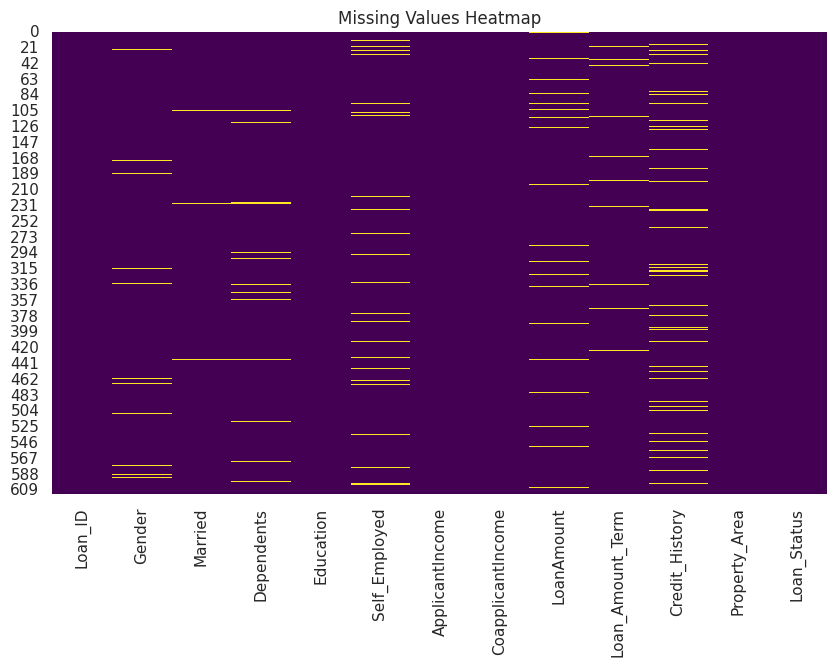

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title("Missing Values Heatmap")
plt.show()

We can immediately see which columns have missing data. The columns with the most yellow lines (like Credit_History, Self_Employed, and LoanAmount) are our primary concern.

Loan_ID, Education, ApplicantIncome, etc., appear to have no missing data (all purple).

We can also see if missingness is random. In this plot, the yellow lines seem scattered, suggesting the data might be Missing Completely at Random (MCAR), rather than in large "chunks" (which would imply a systematic problem)

## 4. Target Variable Analysis

This dataset is imbalanced. When we evaluate our model, we cannot rely only on Accuracy. We must also look at Precision, Recall, and the F1-Score to get a true picture of its performance.

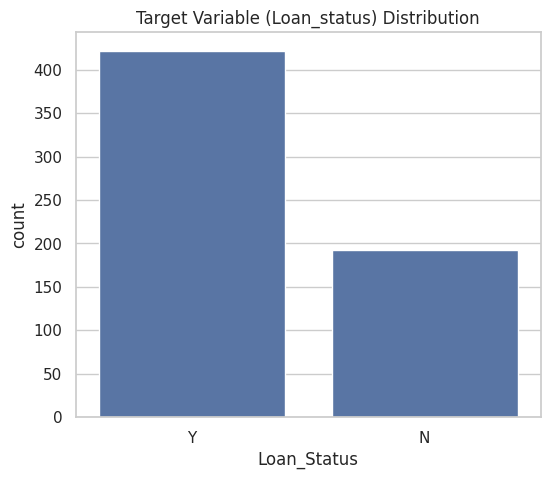

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(x='Loan_Status', data = df)

plt.title('Target Variable (Loan_status) Distribution')
plt.show()

## 5. Univariate Analysis (Analyzing Single Features)

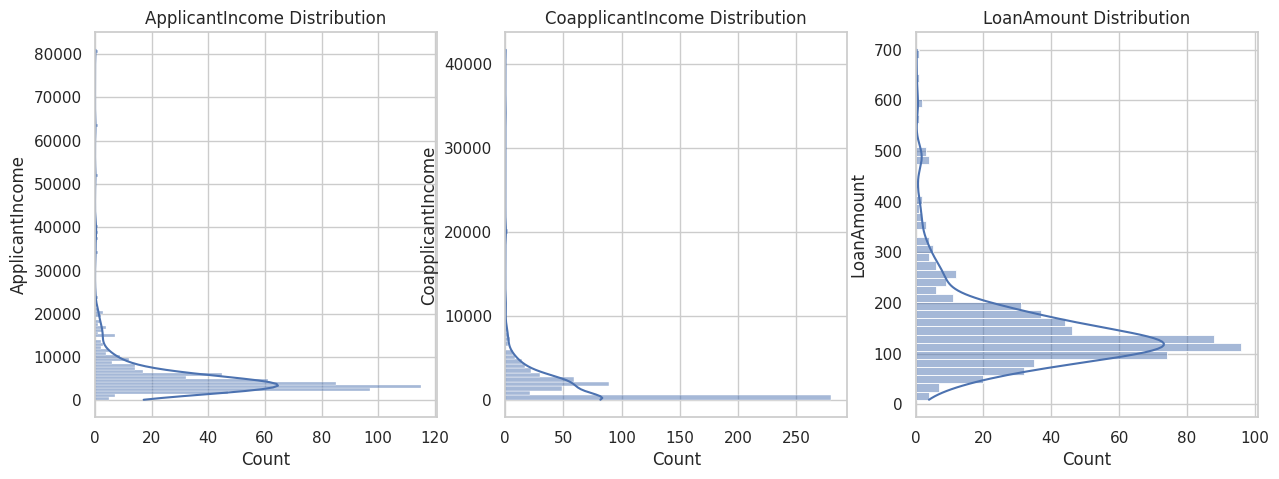

In [13]:
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

plt.figure(figsize = (15,5))
for i, feature in enumerate(numerical_features):
  plt.subplot(1,3,i+1)
  sns.histplot(y=df[feature], kde = True)
  plt.title(f'{feature} Distribution')
plt.tight_layout
plt.show()

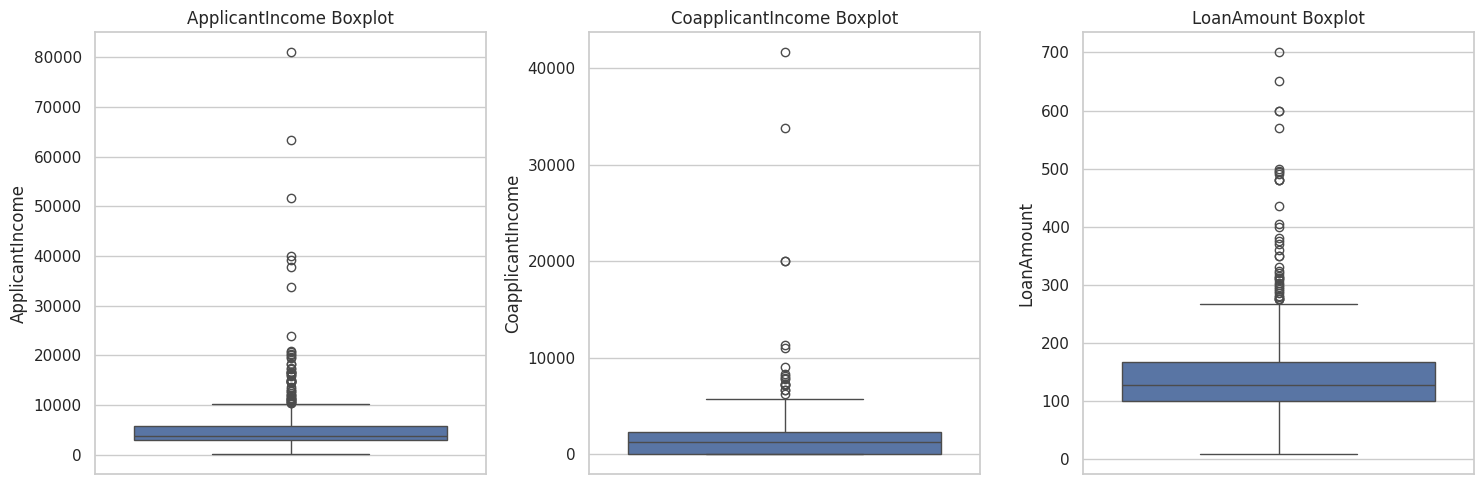

In [14]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(numerical_features):
  plt.subplot(1,3,i+1)
  sns.boxplot(df[feature])
  plt.title(f"{feature} Boxplot")
plt.tight_layout()
plt.show()

ApplicantIncome and LoanAmount is heavily Right-skewed.
Most applicants have low to moderate income, while a few have very high incomes.
LoanAmount is also Right-skewed, but less than others. However, there are several high-value outliers.

-> It will negatively impact some modes like Logistic Regression and SVM

-> We will apply log-transformation

## Categorical Features Distribution

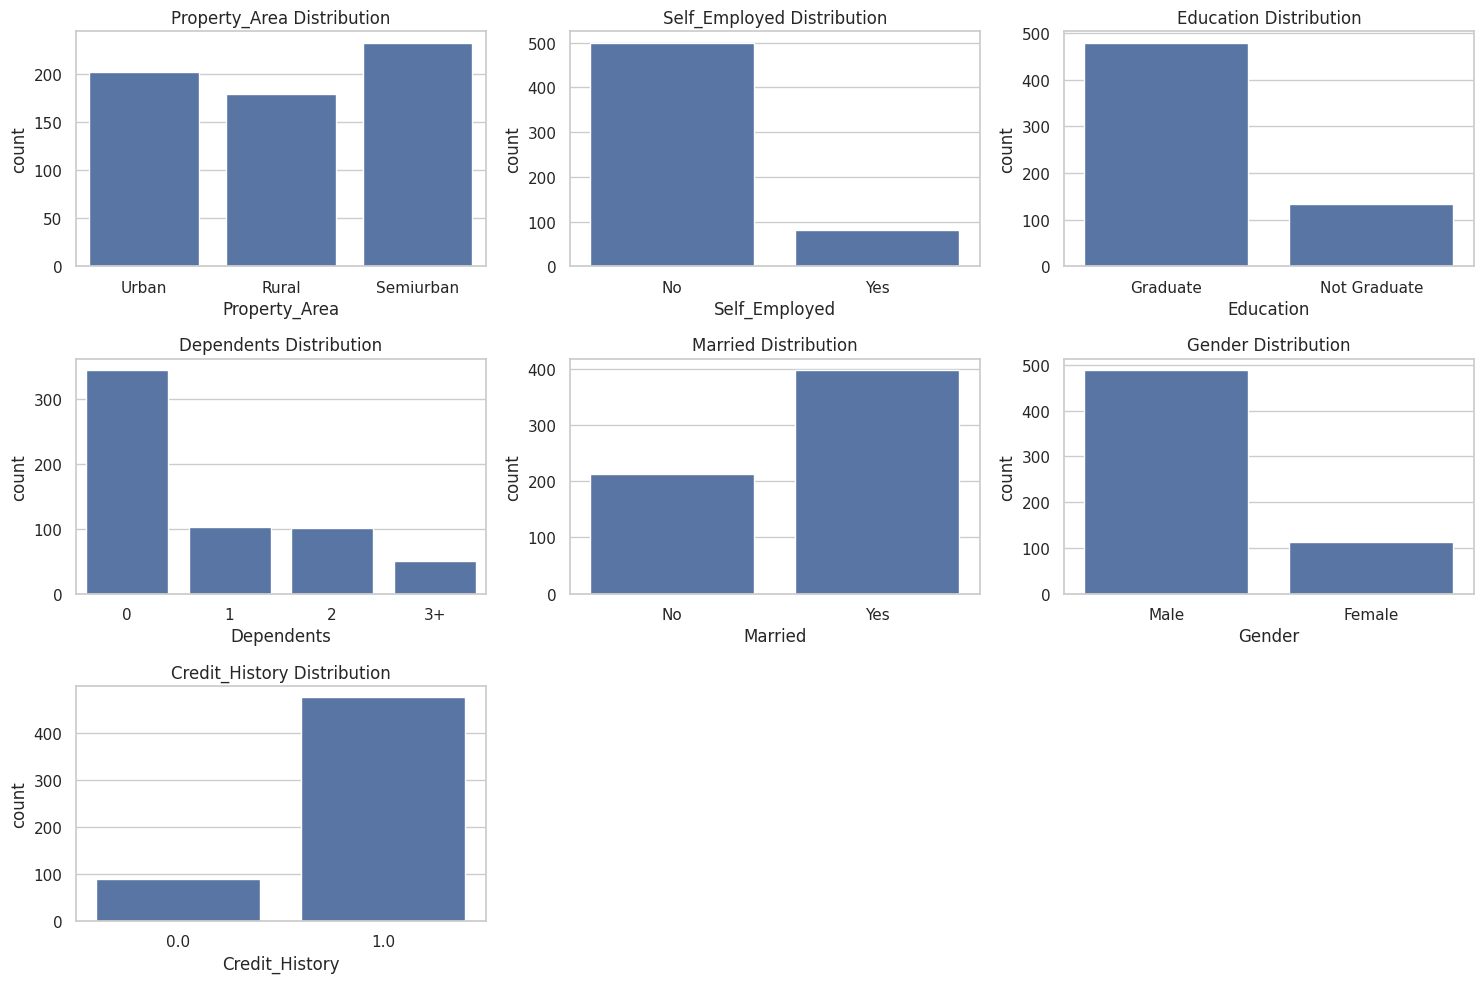

In [15]:
categorical_features = ['Property_Area','Self_Employed','Education',
                        'Dependents','Married','Gender','Credit_History']
plt.figure(figsize=(15,10))
for i, feature in enumerate(categorical_features):
  plt.subplot(3,3,i+1)
  sns.countplot(x=feature, data = df)
  plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()

## Analysis of Categorical Features
=> There are no unusual or erroneous value

The imbalance in features like Gender, Self_Employed, and Credit_History is normal and reflects real-world data.

## 6. Bivariate Analysis

### 6.1 Categorical Features vs. Target Value

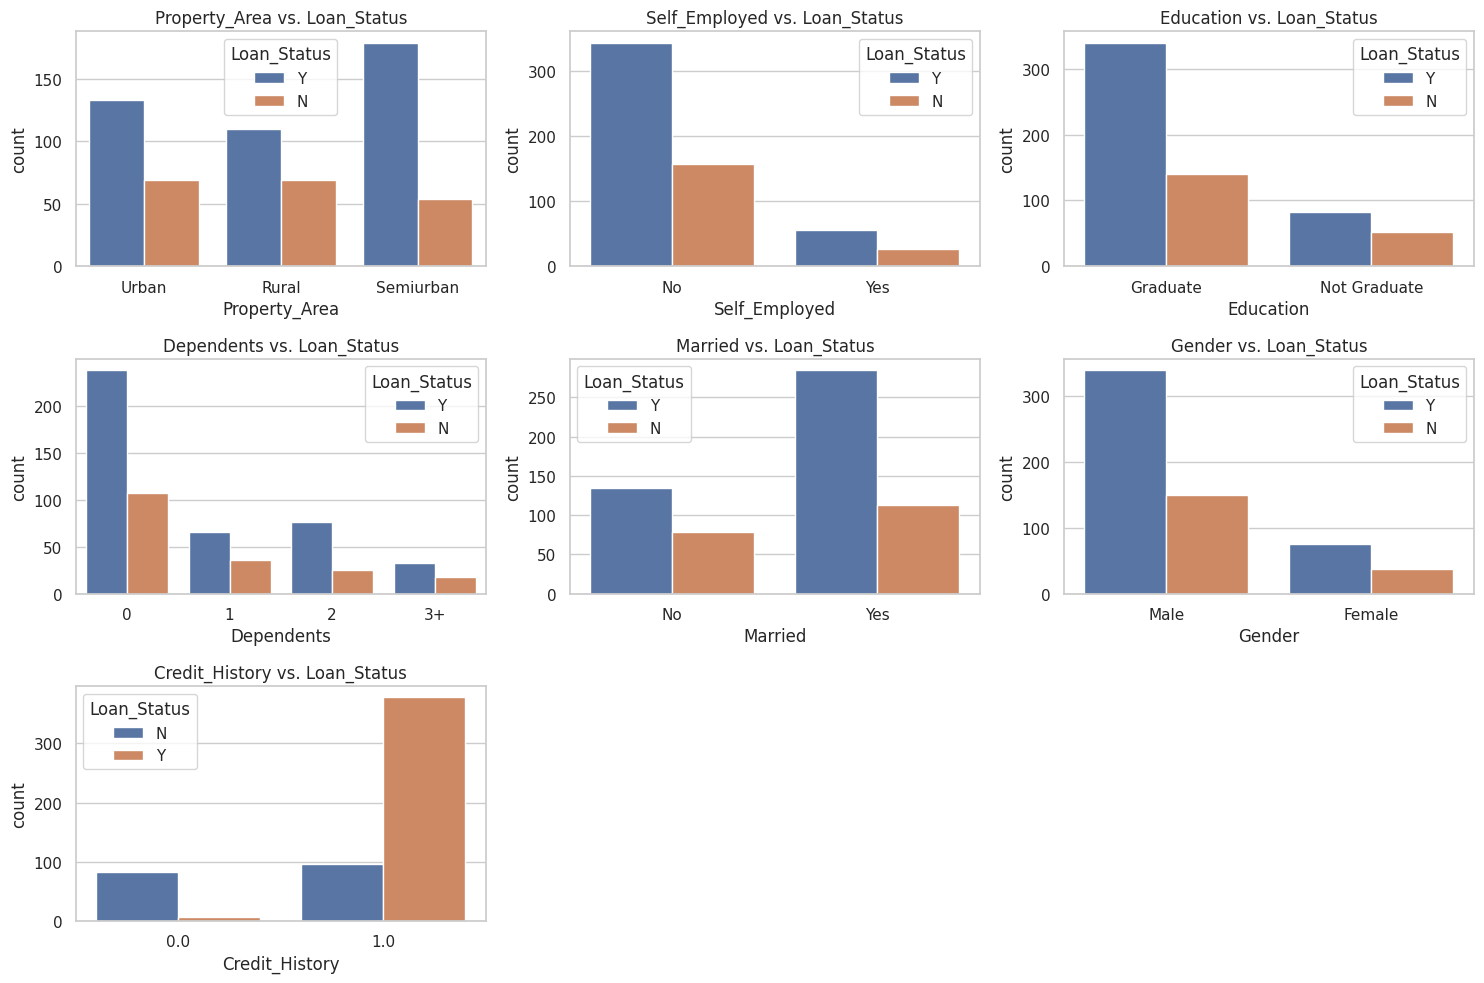

In [16]:
plt.figure(figsize = (15,10))
for i, feature in enumerate (categorical_features):
  plt.subplot(3,3,i+1)
  sns.countplot(x=feature, hue = 'Loan_Status', data = df)
  plt.title(f"{feature} vs. Loan_Status")
plt.tight_layout()
plt.show()

### 6.2 Analysis of Categorical Features vs. Target

- Strongest Predictor : Credit_History
- Good Predictors: Property_Area, Married, Education
- Weak Predictors: Self_Employed, Dependents, Gender

### 6.3 Numerical Features vs. Target

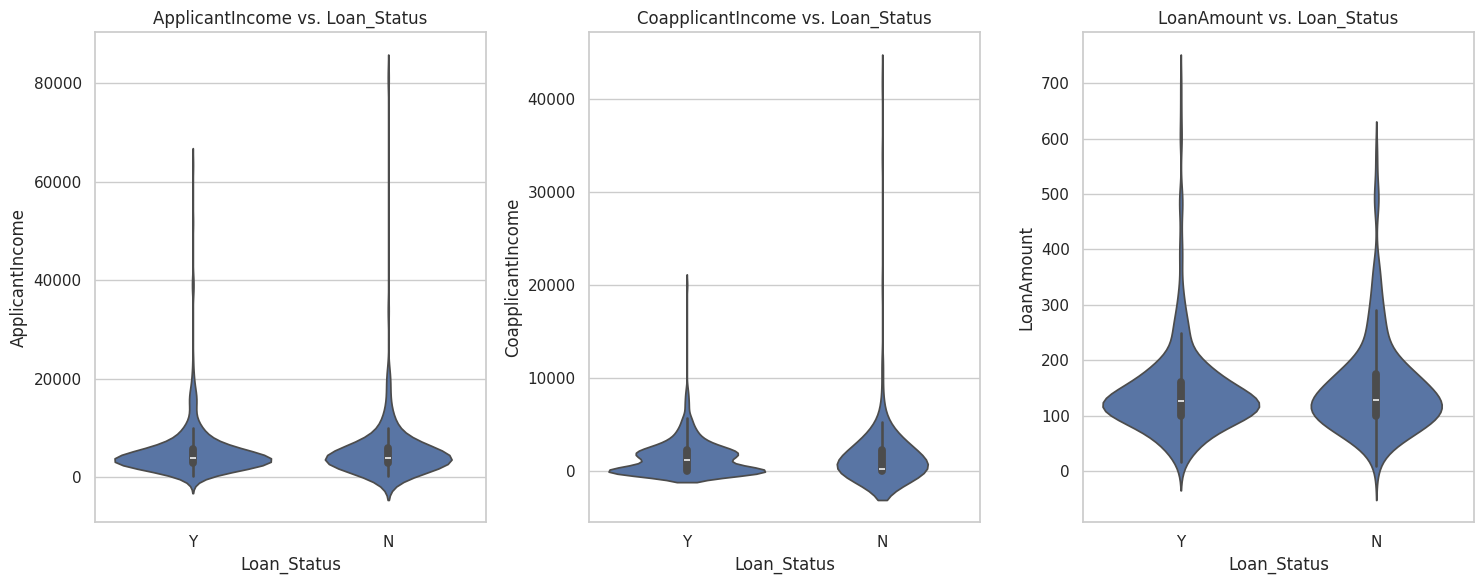

In [17]:
plt.figure(figsize=(15,6))
for i, feature in enumerate(numerical_features):
  plt.subplot(1,3,i+1)
  sns.violinplot  (x='Loan_Status', y = feature, data = df)
  plt.title(f"{feature} vs. Loan_Status")
plt.tight_layout()
plt.show()

## 7. EDA Summary and Conclusions

- Missing data: 7 columns, the most are Credit_History, Self_Employed, LoanAmount. No columns that have too much missing value to drop
- Imbalanced target variable: We can not use only accuracy but also base on F1-Score and ROS-AUC.
- Numerical Features: ApplicantIncome, CoapplicantIncome, LoanAmount are heavily Right-skewed
- Predictive features:
+ Strongest: Credit_History
+ Good: Property_Area, Married, Education
+ Weak: Self_Employed, Dependents, getHandlerByName
+ Too weak: ApplicantIncome

##02. Data Preprocessing & Feature Engineering

### Impute Missing Values

In [18]:
df = df.drop(columns='Loan_ID')
print(len(df))

614


In [19]:
from IPython.utils.text import columnize
for column in categorical_features:
  print("filling" + column)
  df[column] = df[column].fillna(df[column].mode()[0])
  print("done")



fillingProperty_Area
done
fillingSelf_Employed
done
fillingEducation
done
fillingDependents
done
fillingMarried
done
fillingGender
done
fillingCredit_History
done


In [20]:
for column in numerical_features:
  print("filiing" + column)
  df[column] = df[column].fillna(df[column].mean())
  print("done")

filiingApplicantIncome
done
filiingCoapplicantIncome
done
filiingLoanAmount
done


In [21]:
print(df.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [22]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [23]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### Handle Skewness

Log Transformation

In [24]:
for column in numerical_features:
  df[column] = np.log1p(df[column])
df[numerical_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,8.674197,0.000000,4.993232
1,8.430327,7.319202,4.859812
2,8.006701,0.000000,4.204693
3,7.857094,7.765993,4.795791
4,8.699681,0.000000,4.955827


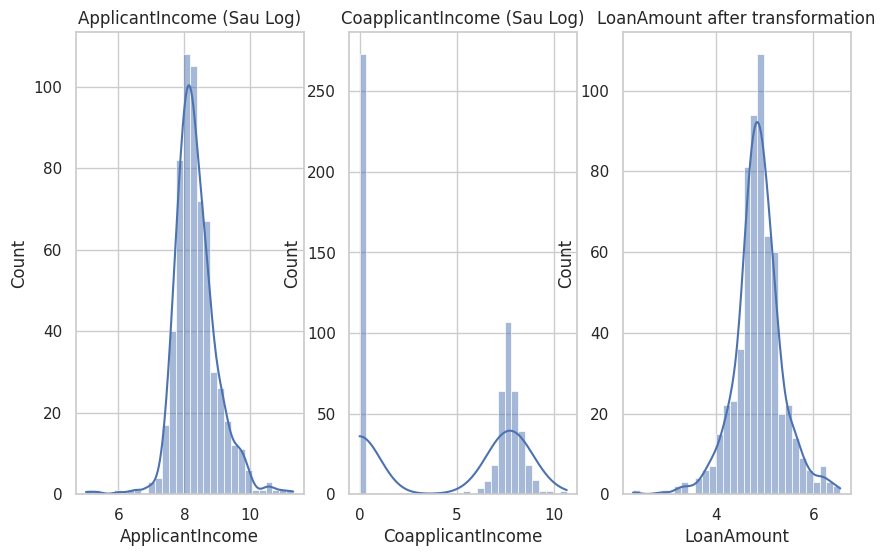

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('ApplicantIncome (Sau Log)')

plt.subplot(1, 3, 2)
sns.histplot(df['CoapplicantIncome'], kde=True, bins=30)
plt.title('CoapplicantIncome (Sau Log)')

plt.subplot(1, 3, 3)
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('LoanAmount after transformation')

plt.tight_layout
plt.show()

Encoding Categorical Features

In [26]:
le = LabelEncoder()
categorical_features_encode = ['Gender', 'Married','Dependents','Education',
                               'Self_Employed','Property_Area','Loan_Status',
                               'Credit_History']
for column in categorical_features_encode:
  df[column] = le.fit_transform(df[column])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1,2,1


In [27]:
df.to_csv('train_cleaned.csv',index = False)

Scaler

## 03. Model Training & Evaluation

In [28]:
cleaned_file = 'train_cleaned.csv'
df = pd.read_csv(cleaned_file)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1,2,1


Split Data

In [29]:
X = df.drop('Loan_Status',axis = 1 )
y = df['Loan_Status']
X.shape

(614, 11)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)
print(y_test.shape)
print(y_train.shape)

(123, 11)
(491, 11)
(123,)
(491,)


## Logistic Regression

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

log_reg_y_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(classification_report(y_test, log_reg_y_pred))
print(confusion_matrix(y_test, log_reg_y_pred))

Logistic Regression Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


Random Forest Classifier

In [34]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train_scaled, y_train)
rf_Y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_Y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_Y_pred))
print(confusion_matrix(y_test, rf_Y_pred))

Random Forest Accuracy: 0.45528455284552843
              precision    recall  f1-score   support

           0       0.35      0.67      0.46        43
           1       0.66      0.34      0.45        80

    accuracy                           0.46       123
   macro avg       0.51      0.51      0.46       123
weighted avg       0.55      0.46      0.45       123

[[29 14]
 [53 27]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


XGBoost Classifier

In [35]:
xgb_model = xgb.XGBClassifier(random_state = 42, eval_metric ='logloss', use_label_encoder = False)
xgb_model.fit(X_train_scaled, y_train)
xgb_y_pred = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_y_pred))
print(confusion_matrix(y_test, xgb_y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:15:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           0       0.74      0.47      0.57        43
           1       0.76      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.76      0.74       123

[[20 23]
 [ 7 73]]


Fixing Overfiting

In [36]:
rf_tuned = RandomForestClassifier(max_depth=5, random_state = 42)
rf_tuned.fit(X_train_scaled, y_train)
rf_tuned_y_pred = rf_tuned.predict(X_test_scaled)
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_y_pred)
print(f"Accuracy Random Forest tunned: {rf_tuned_accuracy}")
print(classification_report(y_test, rf_tuned_y_pred))
print(confusion_matrix(y_test, rf_tuned_y_pred))

Accuracy Random Forest tunned: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

[[18 25]
 [ 2 78]]


SMOTE (Synthetic Minority Over-sampling Technique).

In [37]:
!pip install -q imbalanced-learn

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
print(np.bincount(y_train))
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(np.bincount(y_train_smote))

[149 342]
[342 342]


In [39]:
#Retrain
smote_model_rf = RandomForestClassifier(random_state = 42, max_depth=5)
smote_model_rf.fit(X_train_smote, y_train_smote)
smote_model_y_pred = smote_model_rf.predict(X_test)
smote_model_accuracy = accuracy_score(y_test, smote_model_y_pred)
print(f"Accucracy Random Forest SMOTE: {smote_model_accuracy}")
print(classification_report(y_test, smote_model_y_pred))
print(confusion_matrix(y_test, smote_model_y_pred))

Accucracy Random Forest SMOTE: 0.34959349593495936
              precision    recall  f1-score   support

           0       0.34      0.95      0.51        43
           1       0.50      0.03      0.05        80

    accuracy                           0.35       123
   macro avg       0.42      0.49      0.28       123
weighted avg       0.45      0.35      0.21       123

[[41  2]
 [78  2]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [40]:
#Retrain
smote_model_XGB = xgb.XGBClassifier(random_state = 42)
smote_model_XGB.fit(X_train_smote, y_train_smote)
smote_model_xgb_y_pred = smote_model_XGB.predict(X_test)
smote_model_xgb_accuracy = accuracy_score(y_test, smote_model_xgb_y_pred)
print(f"Accucracy XGB SMOTE: {smote_model_xgb_accuracy}")
print(classification_report(y_test, smote_model_xgb_y_pred))
print(confusion_matrix(y_test, smote_model_xgb_y_pred))

Accucracy XGB SMOTE: 0.34959349593495936
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        43
           1       0.00      0.00      0.00        80

    accuracy                           0.35       123
   macro avg       0.17      0.50      0.26       123
weighted avg       0.12      0.35      0.18       123

[[43  0]
 [80  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


fatal: could not read Username for 'https://github.com': No such device or address
